# <font color=#0404B4>**ĐỒ ÁN THỰC HÀNH - NHẬP MÔN KHOA HỌC DỮ LIỆU** </font>

### <font color=#0404B4> Bảng thành viên nhóm 7 </font>
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

In [1]:
# !pip install vega

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math
import copy
from sklearn.preprocessing import StandardScaler
import altair as alt
# alt.renderers.enable('notebook')
alt.renderers.enable('default')
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression


# <font color=#0404B4>Table of Contents</font>
1. [Thu thập dữ liệu](#1)
2. [Khám phá và tiền xử lý dữ liệu](#2)
3. [Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?](#3)
4. [Với mỗi cột, các giá trị được phân bố như thế nào?](#4)
5.

<a name="1"></a>
# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
- Đại dịch Covid-19 vừa qua đã gây nhiều ảnh hưởng, tác động tích cực lẫn tiêu cực lên đời sống của con người. Do đó, nhiều cuộc khảo sát và phân tích đã diễn ra trong suốt quá trình dịch hoành hành và cả sau khi đại dịch giảm bớt. Đặc biệt, đối với đất nước Ấn Độ, đại dịch Covid-19 đã để lại những hậu quả nặng nề, người chết nhiều vô số kể do điều kiện chăm sóc và kinh tế của đất nước này. Với sự tò mò, nhóm đã đặc biệt quan tâm đến tình hình của Ấn Độ hơn so với những đất nước tiên tiến và phát triển khác. Và đối với của đất nước này, nhóm cảm thấy khá thú vị trong việc tìm hiểu và khai thác về mặt giáo dục lẫn sức khỏe tinh thần của sinh viên, học sinh trong hoàn cảnh phải đối mặt với cơn đại dịch. Vì thế, nhóm đã chọn khai thác bộ dữ liệu về vấn đề nêu trên, để phân tích sâu hơn tình hình ở thời điểm hiện tại (năm 2020) khi Covid-19 bùng phát trên đất nước Ấn Độ. 

### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
- Nhóm sử dụng dữ liệu [**COVID-19 Survey Student Responses.csv**](https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students)
- Tập dữ liệu mô tả Tác động của đợt bùng phát COVID-19 đối với Giáo dục, Sức khỏe tâm thần và Thói quen hàng ngày. Trong nghiên cứu này, một cuộc khảo sát cắt ngang (cross-sectional survey) được tiến hành với 1182 sinh viên thuộc các nhóm tuổi khác nhau đến từ các cơ sở giáo dục khác nhau ở vùng Thủ đô Quốc gia Delhi (NCR) - Ấn Độ vào năm 2020.
- LICENSE của dữ liệu là [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/) - người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Người ta thu thập dữ liệu bằng cách thực hiện khảo sát trên giấy.

<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


## 1. Đọc dữ liệu từ file

In [3]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
df.head(10)

ID Region of residence  Age of Subject  Time spent on Online Class  \
0   R1           Delhi-NCR              21                         2.0   
1   R2           Delhi-NCR              21                         0.0   
2   R3           Delhi-NCR              20                         7.0   
3   R4           Delhi-NCR              20                         3.0   
4   R5           Delhi-NCR              21                         3.0   
5   R6           Delhi-NCR              21                         0.0   
6   R7           Delhi-NCR              19                         2.0   
7   R8   Outside Delhi-NCR              19                         2.0   
8   R9           Delhi-NCR              21                         3.0   
9  R10   Outside Delhi-NCR              20                         0.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   
5                         Very poor              Smartphone   
6                         Very poor              Smartphone   
7                         Very poor                  Tablet   
8                         Very poor          Laptop/Desktop   
9                         Very poor          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0                    2.0                 10.0   
2                       3.0                    0.0                  6.0   
3                       2.0                    1.0                  6.0   
4                       3.0                    1.0                  8.0   
5                       6.0                    0.0                  5.0   
6                       2.0                    1.0                  5.0   
7                       1.0                    1.0                 10.0   
8                       4.0                    1.0                  8.0   
9                       1.0                    0.5                  8.0   

   Time spent on social media Prefered social media platform Time spent on TV  \
0                         3.0                       Linkedin                1   
1                         3.0                        Youtube                0   
2                         2.0                       Linkedin                0   
3                         5.0                      Instagram                0   
4                         3.0                      Instagram                1   
5                         1.0                        Youtube                0   
6                         4.0                      Instagram                0   
7                         5.0                      Instagram                0   
8                         2.0                       Whatsapp                1   
9                         5.0                      Instagram                3   

   Number of meals per day Change in your weight Health issue during lockdown  \
0                        4             Increased                           NO   
1                        3             Decreased                           NO   
2                        3       Remain Constant                           NO   
3                        3             Decreased                           NO   
4                        4       Remain Constant                           NO   
5                        1             Decreased                          YES   
6                        3             Increased                           NO   
7                        3             Increased                          YES   
8                        3             Increased

### 2.2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin chi tiết sinh hoạt của học sinh/ sinh viên/ giảng viên sau tác động của COVID-19 đối với giáo dục và đời sống xã hội và sức khỏe tinh thần.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 2.3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Do ở đây cột `ID` mang tính định danh cho từng cá nhân nên ta sẽ kiểm tra xem thử có ID  nào trùng nhau không.

In [4]:
check_duplicated = set(df.ID.duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 2.4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|ID|<center>Mã định danh của từng người<center>|
|2|Region of residence| <center>Khu vực sinh sống<center>|
|3|Age of Subject|<center>Tuổi<center>| Năm
|4|Time spent on Online Class| <center>Thời gian học Online<center>| Giờ|
|5|Rating of Online Class experience|<center>Xếp loại kinh nghiệm học Online<center>|  | 
|6|Medium for online class|<center>Thiết bị sử dụng học Online<center>|  Giờ
|7|Time spent on self study|<center>Thời gian tự học<center>| Giờ |
|8|Time spent on fitness|<center>Thời gian thể dục, tập luyện<center>| Giờ |
|9|Time spent on sleep|<center>Thời gian ngủ<center>| Giờ |
|10|Time spent on social media|<center>Thời gian sử dụng MXH<center>| Giờ |
|11|Prefered social media platform|<center>Nền tảng MXH sử dụng<center>| |
|12|Time spent on TV|<center>Thời gian sử dụng TV<center>| Giờ |
|13|Number of meals per day|<center>Số bữa ăn trong ngày<center>| Lần |
|14|Change in your weight|<center>Dao động cân nặng<center>|  |
|15|Health issue during lockdown|<center>Có vấn đề gì về sức khỏe trong khoảng thời gian đóng cửa vì COVID-19 không?<center>|  |
|16|Stress busters|<center>Việc làm giúp xả stress<center>|  |
|17|Time utilized|<center>Thời gian được tối ưu không?<center>|  |
|18|Do you find yourself more connected with your family, close friends , relatives  ?|<center>Có cảm thấy được gắn kết nhiều hơn vớ gia đình, bạn bè không?<center>|  |
|19|What you miss the most|<center>Điều gì bạn hối tiếc nhất?<center>|



* **Thời gian cập nhật dữ liệu** 2021

<h3> 2.5. Với mỗi cột, dữ liệu phân bố như thế nào?</h3>

In [5]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

3 Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợpđể có thể xử lý tiếp hay không?

4 Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

5 Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

<a name="3"></a>
## <font color=#0404B4>3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?</font>



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

Ta thấy một số vấn đề cần giải quyết:

- Cột `Time spent on TV` là cột đúng ra có dạng dữ liệu numerical. Nên ta sẽ tiến hành xử lý các cột này để đưa chúng về đúng kiểu dữ liệu.

In [8]:
df['Time spent on TV'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

Ta sẽ tiến hành xử lý các giá trị "No tv", "N", "n", và " " bằng cách quy đổi chúng về 0, tức là số giờ sử dụng TV là 0 giờ.

In [9]:
def conditions(x):
    if x=='No tv' or x=='n' or x=='N' or x==' ':
        return '0'
    else: 
        return x
    
df['Time spent on TV'] = df['Time spent on TV'].apply(conditions)

Cuối cùng, ta tiến hành ép kiểu cột `Time spent on TV` thành kiểu dữ liệu `float`.

In [10]:
df['Time spent on TV'] = df['Time spent on TV'].apply(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

<a name="4"></a>
## <font color=#0404B4> 4. Với mỗi cột, các giá trị được phân bố như thế nào?</font>

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 8 cột thuộc nhóm numeric: `Age of Subject`, `Time spent on Online Class`, `Time spent on self study`, `Time spent on fitness`, `Time spent on sleep`, `Time spent on social media`, `Time spent on TV`, `Number of meals per day`.

In [11]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

Age of Subject  Time spent on Online Class  Time spent on self study  \
0              21                         2.0                       4.0   
1              21                         0.0                       0.0   
2              20                         7.0                       3.0   
3              20                         3.0                       2.0   
4              21                         3.0                       3.0   

   Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                    0.0                  7.0                         3.0   
1                    2.0                 10.0                         3.0   
2                    0.0                  6.0                         2.0   
3                    1.0                  6.0                         5.0   
4                    1.0                  8.0                         3.0   

   Time spent on TV  Number of meals per day  
0               1.0                        4  
1               0.0                        3  
2               0.0                        3  
3               0.0                        3  
4               1.0                        4

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 8 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [12]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

Age of Subject  Time spent on Online Class  \
missing_ratio             0.0                         0.0   
min                       7.0                         0.0   
max                      59.0                        10.0   

               Time spent on self study  Time spent on fitness  \
missing_ratio                       0.0                    0.0   
min                                 0.0                    0.0   
max                                18.0                    5.0   

               Time spent on sleep  Time spent on social media  \
missing_ratio                  0.0                         0.0   
min                            4.0                         0.0   
max                           15.0                        10.0   

               Time spent on TV  Number of meals per day  
missing_ratio               0.0                      0.0  
min                         0.0                      1.0  
max                        15.0                      8.0

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 11 cột thuộc nhóm categorical: `ID`, `Region of residence`, `Rating of Online Class experience`, `Rating of Online Class experience`, `Medium for online class`, `Prefered social media platform`, `Change in your weight`, `Change in your weight`, `Health issue during lockdown`, `Stress busters`, `Time utilized`, `Do you find yourself more connected with your family, close friends , relatives  ?`, `What you miss the most`. 

In [13]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

ID Region of residence Rating of Online Class experience  \
0  R1           Delhi-NCR                              Good   
1  R2           Delhi-NCR                         Excellent   
2  R3           Delhi-NCR                         Very poor   
3  R4           Delhi-NCR                         Very poor   
4  R5           Delhi-NCR                              Good   

  Medium for online class Prefered social media platform  \
0          Laptop/Desktop                       Linkedin   
1              Smartphone                        Youtube   
2          Laptop/Desktop                       Linkedin   
3              Smartphone                      Instagram   
4          Laptop/Desktop                      Instagram   

  Change in your weight Health issue during lockdown  \
0             Increased                           NO   
1             Decreased                           NO   
2       Remain Constant                           NO   
3             Decreased                           NO   
4       Remain Constant                           NO   

                   Stress busters Time utilized  \
0                         Cooking           YES   
1  Scrolling through social media           YES   
2              Listening to music            NO   
3             Watching web series            NO   
4                    Social Media            NO   

  Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                                                YES   
1                                                                                 NO   
2                                                                                YES   
3                                                                                 NO   
4                                                                                 NO   

  What you miss the most  
0         School/college  
1  Roaming around freely  
2             Travelling  
3    Friends , relatives  
4             Travelling

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 7 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [14]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

ID  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                       1182   
ratio_diff_vals  {'R1': 0.0, 'R785': 0.0, 'R801': 0.0, 'R800': 0.0, 'R799': 0.0, 'R798': 0.0, 'R797': 0.0, 'R796': 0.0, 'R795': 0.0, 'R794': 0.0, 'R793': 0.0, 'R792': 0.0, 'R791': 0.0, 'R790': 0.0, 'R789': 0.0, 'R...   

                                            Region of residence  \
missing_ratio                                               0.0   
num_diff_vals                                                 2   
ratio_diff_vals  {'Delhi-NCR': 0.61, 'Outside Delhi-NCR': 0.39}   

                                                                  Rating of Online Class experience  \
missing_ratio                                                                              2.030457   
num_diff_vals                                                                                     5   
ratio_diff_vals  {'Very poor': 0.36, 'Average': 0.33, 'Good': 0.2, 'Excellent': 0.08, 'Poor': 0.03}   

                                                                                                              Medium for online class  \
missing_ratio                                                                                                                4.314721   
num_diff_vals                                                                                                                       5   
ratio_diff_vals  {'Laptop/Desktop': 0.48, 'Smartphone': 0.48, 'Tablet': 0.03, 'Any Gadget': 0.0, 'Smartphone or Laptop/Desktop': 0.0}   

                                                                                                                                                                                          Prefered social media platform  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                         16   
ratio_diff_vals  {'Instagram': 0.3, 'Whatsapp': 0.28, 'Youtube': 0.27, 'Linkedin': 0.05, 'Facebook': 0.04, 'Twitter': 0.02, 'None': 0.01, 'Snapchat': 0.01, 'Reddit': 0.0, 'Telegram': 0.0, 'Omegle': 0.0, 'Elyment':...   

                                                           Change in your weight  \
missing_ratio                                                                0.0   
num_diff_vals                                                                  3   
ratio_diff_vals  {'Remain Constant': 0.45, 'Increased': 0.37, 'Decreased': 0.18}   

                Health issue during lockdown  \
missing_ratio                            0.0   
num_diff_vals                              2   
ratio_diff_vals    {'NO': 0.86, 'YES': 0.14}   

                                                                                                                                                                                                          Stress busters  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                         86   
ratio_diff_vals  {'Listening to

<a name="5"></a>
## <font color=#0404B4> 5. Có cột nào cần phải tiền xử lý hay không?</font>


Nếu ta để ý kĩ, cột `Prefered social media platform` xuất hiện trường hợp trùng lắp thông tin, ta sẽ kiểm tra các giá trị hiện đang có trong cột này.

In [15]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

Ta thấy ở đây có 2 trường hợp:
- **'WhatsApp'** và **'Whatsapp'** là cùng 1 platform nhưng do quá trình nhập dữ liệu đã gây ra sự xung đột về thông tin. Do đó, ở trường hợp này ta sẽ xử lý bằng cách đưa toàn bộ giá trị **'Whatsapp'** về **'WhatsApp'**.
- **'None '** và **'None'** cũng tương tự trường hợp trên và ta sẽ đưa về **'None'**.

In [16]:
df['Prefered social media platform'] = df['Prefered social media platform'].replace(to_replace=['Whatsapp', 'None '],
           value=['WhatsApp', 'None'])

Ta kiểm tra lại sau khi đã xử lý các trường hợp trên:

In [17]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'WhatsApp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'Quora', 'Talklife'], dtype=object)

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

### 1. Tổng quan

Trước tiên, ta sẽ nhìn tập dữ liệu một cách tổng quan trước. Ta sẽ dùng biểu đồ histogram để xem sự phân bố dữ liệu ở mỗi thuộc tính, xu hướng của dữ liệu ở mỗi thuộc tính.

In [18]:
def distribution(df, name_col):
    hist = alt.Chart(df).mark_bar().encode(x=name_col, y='count()',color=alt.Color('Region of residence', type='nominal')).properties(
    width=180,
    height=180
    )
    return hist

names = list(df.columns)
plts = list()
for name in names[1:]:
    plts.append(distribution(df, name))

plts[0]|plts[1]|plts[2]|plts[3]

alt.HConcatChart(...)

#### Nhận xét:
- Ở cột `Region of residence`, ta thấy phần lớn người làm khảo sát đều đến từ Delhi, hơn số người nằm ngoài Delhi khoảng 300 người. Do đó, khi phân tích, ta có thể dễ bị ngộ nhận.
- Ở cột `Age of Subject`, độ tuổi trung bình của những người thực hiện khảo sát nằm từ khoảng trên 15 tuổi đến nhỏ hơn 30 tuổi. Đây là độ tuổi trẻ (thanh thiếu niên) nên khi phân tích ta cần chú ý vào điều này.
- Những người thực hiện khảo sát phần lớn thường dành từ 2 đến 5 tiếng mỗi ngày cho việc học online, tuy nhiên cũng một phần không nhỏ không chọn thực hiện việc học online.
- Hầu hết trải nghiệm việc học online được đánh giá trung bình và rất tệ.

In [19]:
plts[4]|plts[5]|plts[6]|plts[7]

alt.HConcatChart(...)

#### Nhận xét:
- Chỉ một phần nhỏ người thực hiện khảo sát không có sự chuẩn bị thiết bị điện tử phục vụ cho việc học online.
- Thời gian tự học sẽ trải dài từ khoảng gần nửa tiếng đến 4 tiếng một ngày.
- Mỗi ngày, gần một nửa người thực hiện khảo sát là dành ra 1 tiếng mỗi ngày để tập thể dục, gần xấp xỉ một nửa còn lại không thích thú với việc tập thể dục mỗi ngày.
- Thời gian ngủ trung bình mỗi ngày là 8 tiếng (được thống kê nhiều nhất), đa số người tham gia khảo sát đều ngủ đủ giấc.

In [20]:
plts[8]|plts[9]|plts[10]|plts[11]

alt.HConcatChart(...)

- Ở cột `Time spent on social media`, thời gian dùng mạng xã hội trung bình một ngày khoảng từ 1 tiếng đến 2 tiếng mỗi ngày.
- Mạng xã hội được ưu chuộng nhiều nhất lần lượt là: **Instagram**, **WhatsApp** và **Youtube**.
- Thời gian xem TV sẽ trải dài từ nửa tiếng đến khoảng 3 tiếng một ngày.
- Đa số người tham gia khảo sát sẽ ăn đủ 3 bữa một ngày.

In [21]:
plts[12]|plts[13]|plts[15]|plts[16]

alt.HConcatChart(...)

#### Nhận xét:
- Cân nặng của những người thực hiện khảo sát hầu như đều tăng hoặc giữ nguyên trong suốt quá trình phong tỏa.
- Ở cột `Health issue during lockdown`, đa số đều không gặp vấn đề sức khỏe.
- Đa số người thực hiện khảo sát đều cảm thấy gắn kết với người trong gia đình hơn trong quá trình giãn cách phong tỏa.

### 2. Phân tích

### Liệu có mối quan hệ nào giữa hai cặp thuộc tính bất kì với nhau?

Ta sẽ tiến hành tính ma trận tương quan (Correlation matrix) giữa các thuộc tính dạng numeric để tìm xem liệu có cặp thuộc tính nào tương quan với nhau hay không?

In [22]:
corr_matrix = df.corr()
corr_matrix

Age of Subject  Time spent on Online Class  \
Age of Subject                    1.000000                   -0.171800   
Time spent on Online Class       -0.171800                    1.000000   
Time spent on self study          0.008600                    0.119318   
Time spent on fitness            -0.055098                   -0.026745   
Time spent on sleep              -0.116710                   -0.177782   
Time spent on social media        0.069938                   -0.117121   
Time spent on TV                 -0.046519                   -0.017360   
Number of meals per day          -0.034250                    0.003237   

                            Time spent on self study  Time spent on fitness  \
Age of Subject                              0.008600              -0.055098   
Time spent on Online Class                  0.119318              -0.026745   
Time spent on self study                    1.000000               0.022088   
Time spent on fitness                       0.022088               1.000000   
Time spent on sleep                        -0.218573              -0.043975   
Time spent on social media                 -0.162613              -0.042855   
Time spent on TV                           -0.133559               0.012940   
Number of meals per day                     0.065931               0.128537   

                            Time spent on sleep  Time spent on social media  \
Age of Subject                        -0.116710                    0.069938   
Time spent on Online Class            -0.177782                   -0.117121   
Time spent on self study              -0.218573                   -0.162613   
Time spent on fitness                 -0.043975                   -0.042855   
Time spent on sleep                    1.000000                    0.085667   
Time spent on social media             0.085667                    1.000000   
Time spent on TV                       0.082910                    0.138199   
Number of meals per day                0.046676                    0.029498   

                            Time spent on TV  Number of meals per day  
Age of Subject                     -0.046519                -0.034250  
Time spent on Online Class         -0.017360                 0.003237  
Time spent on self study           -0.133559                 0.065931  
Time spent on fitness               0.012940                 0.128537  
Time spent on sleep                 0.082910                 0.046676  
Time spent on social media          0.138199                 0.029498  
Time spent on TV                    1.000000                -0.009189  
Number of meals per day            -0.009189                 1.000000

Ở đây, ta sẽ dùng Heatmap để trực quan ma trận trên thành các thang màu dễ dàng nhận biết và quan sát. 
- Thang màu càng nhạt dần, nghĩa là độ tương quan càng cao
- Thang màu càng đậm dần nghĩa là độ tương quan càng thấp.

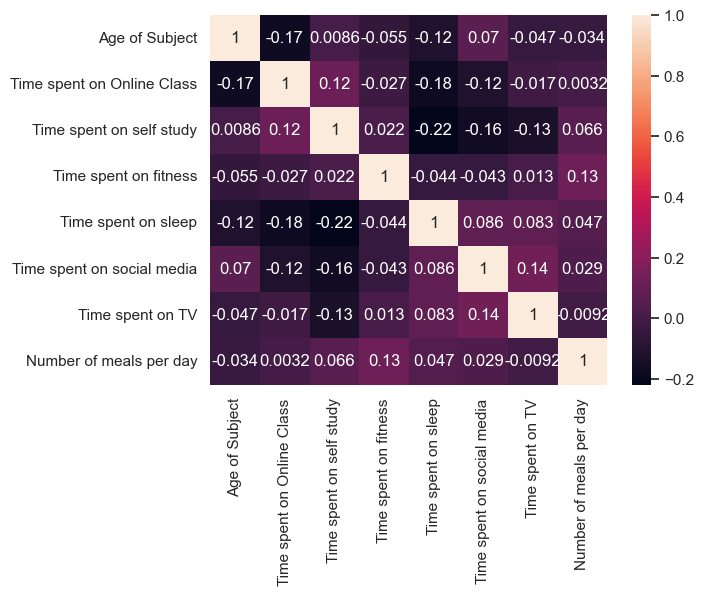

In [23]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Nhận xét:

- Ta thấy các cặp thuộc tính có hệ số tương quan âm nằm trong khoảng từ -0.22 đến -0.16:
    - `Age of Subject` và `Time spent on Online Class`
    - `Time spent on Online Class` và `Time spent on sleep`
    - `Time spent on self study` và `Time spent on sleep`
    - `Time spent on self study` và `Time spent on social media`
    
    Đây là một mối **tương quan âm yếu** giữa hai biến. Giá trị này cho thấy rằng khi giá trị của biến X tăng lên, giá trị của biến Y sẽ giảm xuống và ngược lại, tuy nhiên mối tương quan này không mạnh và nó có thể bị ảnh hưởng bởi một số yếu tố khác.</br></br>
    


- Ngoài các cặp thuộc tính có mối tương quan âm yếu, ta còn có các cặp có mối tương quan dương:
    - `Time spent on social media` và `Time spent on TV`.
    - `Time spent on fitness` và `Number of meals per day`

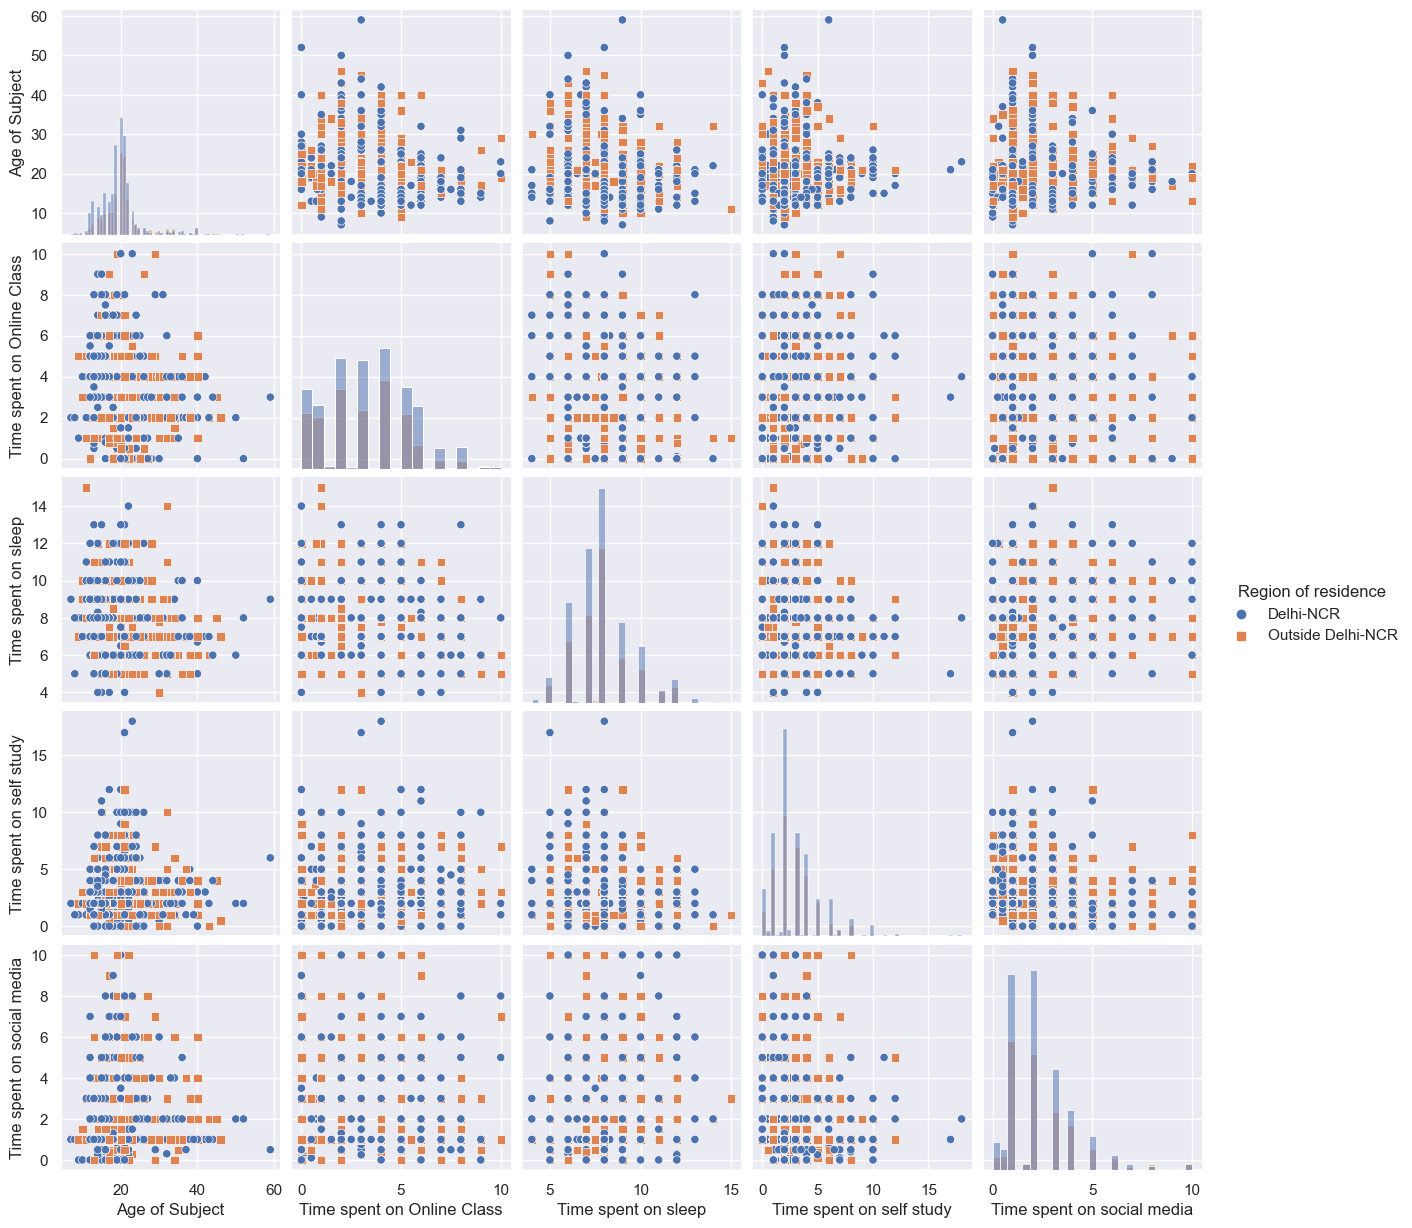

In [24]:
corr_df = df[['Region of residence','Age of Subject', 'Time spent on Online Class', 'Time spent on sleep', 'Time spent on self study', 
             'Time spent on social media']]
sns.pairplot(corr_df, diag_kind='hist', hue='Region of residence', markers=['o', 's', 'D'])

In [35]:
# Convert columns to numeric type
tmp_df = df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 
             'Time spent on sleep', 'Time spent on social media','Time spent on TV','Number of meals per day',
             'Region of residence', 'Medium for online class',
             'Prefered social media platform', 'Change in your weight','Rating of Online Class experience']].copy()
            
tmp_df['Time spent on Online Class'] = pd.to_numeric(tmp_df['Time spent on Online Class'], errors='coerce')
tmp_df['Time spent on self study'] = pd.to_numeric(tmp_df['Time spent on self study'], errors='coerce')
tmp_df['Time spent on fitness'] = pd.to_numeric(tmp_df['Time spent on fitness'], errors='coerce')
tmp_df['Time spent on sleep'] = pd.to_numeric(tmp_df['Time spent on sleep'], errors='coerce')
tmp_df['Time spent on social media'] = pd.to_numeric(tmp_df['Time spent on social media'], errors='coerce')
tmp_df['Time spent on TV'] = pd.to_numeric(tmp_df['Time spent on TV'], errors='coerce')
tmp_df['Number of meals per day'] = pd.to_numeric(tmp_df['Number of meals per day'], errors='coerce')

# Drop rows with missing values
tmp_df.dropna(inplace=True)

# # Convert categorical variables to numerical
tmp_df = pd.get_dummies(tmp_df, columns=['Region of residence', 'Medium for online class'
       ,'Prefered social media platform', 'Change in your weight'])

# Create a mapping dictionary
mapping_dict = {
    'Very poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}

# Apply the mapping to the column
tmp_df['Rating of Online Class experience'] = tmp_df['Rating of Online Class experience'].apply(lambda x: mapping_dict[x])

# Split data into input (X) and output (y) variables
X = tmp_df.drop(columns=['Rating of Online Class experience'])
y = tmp_df['Rating of Online Class experience']
    

# Standardize input variables
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Fit linear regression model
model = LinearRegression().fit(X, y)

print('Coefficients:', model.coef_)
print('Mean square error: {}'.format(model.score(X, y))) 

Coefficients: [ 1.79010470e-01 -5.03652944e-03  1.52310967e-01  5.49407026e-02
 -1.36440078e-01  1.94756606e-01 -9.37994667e-02  1.49636528e+13
  1.49636528e+13  5.66891767e+12  4.26965724e+13  4.26777179e+13
  5.66891767e+12  1.52004161e+13 -2.31660200e+11 -1.60217538e+12
 -3.55869807e+12 -1.70510753e+12 -9.48373174e+11 -2.31660200e+11
 -5.17090314e+11 -6.53201354e+11 -2.31660200e+11 -4.00891993e+11
 -1.14593444e+12 -3.51734041e+12 -3.46258061e+12  1.53447034e+13
  1.94132541e+13  1.99661751e+13]
Variance score: 0.11180276994943306


In [41]:
y_pred = model.predict(X)
y_pred

array([1.98263082, 2.24923239, 2.60372457, ..., 2.40548239, 3.11641989,
       3.37813864])

In [42]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y, y_pred)

0.11180289423327905